In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv('/content/sample_data/Generation_data.csv')

In [ ]:
df.head()

,MODULE_TEMP,Amb_Temp,WIND_Speed,IRR (W/m2),DC Current in Amps,AC Ir in Amps,AC Iy in Amps,AC Ib in Amps,AC Power in Watts
0,18.7675,17.85190,47.60506,6.388252,0.60,8.6,8.6,8.7,3233
1,18.6150,18.59573,64.26684,12.776500,0.66,9.6,9.7,10.0,4504
2,18.9200,18.59573,85.68912,17.035340,4.74,11.9,12.0,12.4,6614
3,18.9200,18.59573,83.30886,25.553010,8.18,14.8,14.7,14.7,8971
4,19.0725,18.59573,57.12608,36.200090,26.66,18.6,18.4,18.5,12071


In [ ]:
df.isnull().sum()

,0
MODULE_TEMP,0
Amb_Temp,0
WIND_Speed,0
IRR (W/m2),0
DC Current in Amps,0
AC Ir in Amps,0
AC Iy in Amps,0
AC Ib in Amps,0
AC Power in Watts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118865 entries, 0 to 118864
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MODULE_TEMP         118865 non-null  float64
 1   Amb_Temp            118865 non-null  float64
 2   WIND_Speed          118865 non-null  float64
 3   IRR (W/m2)          118865 non-null  float64
 4   DC Current in Amps  118865 non-null  float64
 5   AC Ir in Amps       118865 non-null  float64
 6   AC Iy in Amps       118865 non-null  float64
 7   AC Ib in Amps       118865 non-null  float64
 8   AC Power in Watts   118865 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 8.2 MB


In [ ]:
df.describe()

,MODULE_TEMP,Amb_Temp,WIND_Speed,IRR (W/m2),DC Current in Amps,AC Ir in Amps,AC Iy in Amps,AC Ib in Amps,AC Power in Watts
count,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000
mean,37.141972,22.961983,224.429052,428.093276,355.902071,172.329754,172.190557,172.351243,128081.179666
std,12.017936,3.921594,230.238430,313.280827,264.863384,120.507508,120.448101,120.503308,91193.677193
min,8.855000,10.413610,0.238025,2.129417,0.600000,1.400000,1.400000,1.500000,394.000000
25%,26.697500,20.083390,28.325010,155.447500,126.180000,65.600000,65.500000,65.600000,47737.000000
50%,36.457500,23.058700,59.030280,357.742100,298.600000,150.000000,150.000000,150.100000,110673.000000
75%,46.675000,26.034020,442.727100,687.801800,576.320000,277.700000,277.400000,277.600000,206594.000000
max,72.447500,34.959970,597.443500,1494.851000,995.679988,461.200000,461.100000,461.700000,332614.000000


In [ ]:
x = df.drop('AC Power in Watts', axis=1)
y = df['AC Power in Watts']

In [ ]:
x

,MODULE_TEMP,Amb_Temp,WIND_Speed,IRR (W/m2),DC Current in Amps,AC Ir in Amps,AC Iy in Amps,AC Ib in Amps
0,18.76750,17.85190,47.605060,6.388252,0.60,8.6,8.6,8.7
1,18.61500,18.59573,64.266840,12.776500,0.66,9.6,9.7,10.0
2,18.92000,18.59573,85.689120,17.035340,4.74,11.9,12.0,12.4
3,18.92000,18.59573,83.308860,25.553010,8.18,14.8,14.7,14.7
4,19.07250,18.59573,57.126080,36.200090,26.66,18.6,18.4,18.5
...,...,...,...,...,...,...,...,...
118860,30.96750,31.24082,59.268310,38.329510,27.64,18.9,18.7,18.7
118861,30.66249,30.49699,59.268310,31.941260,15.30,16.0,15.9,16.2
118862,29.74750,30.49699,59.268310,27.682420,6.42,13.9,13.9,14.5
118863,29.13750,30.49699,59.268310,19.164760,0.66,12.3,12.2,12.4


In [ ]:
y

,AC Power in Watts
0,3233
1,4504
2,6614
3,8971
4,12071
...,...
118860,12789
118861,10727
118862,9081
118863,7360


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,MODULE_TEMP,Amb_Temp,WIND_Speed,IRR (W/m2),DC Current in Amps,AC Ir in Amps,AC Iy in Amps,AC Ib in Amps
112591,56.5875,29.00933,15.70967,1011.47300,871.019990,376.0,376.0,376.1
18411,26.6975,21.57104,428.44560,78.78844,68.480000,36.6,36.6,36.7
63595,35.5425,22.31487,587.92250,1064.70900,821.919988,401.2,400.8,401.3
41385,31.8825,20.08339,478.43090,315.15370,264.580000,138.1,138.2,138.4
44915,47.7425,21.57104,347.51700,672.89590,605.000000,285.2,284.7,284.7
...,...,...,...,...,...,...,...,...
76820,63.7550,31.24082,24.27858,941.20250,817.439982,356.9,356.8,357.1
110268,24.8675,25.29019,59.03028,53.23543,2.580000,12.8,12.7,13.0
103694,23.1900,17.85190,45.22481,159.70630,110.960000,59.6,59.5,59.6
860,36.1525,21.57104,587.92250,340.70680,289.620000,151.0,150.8,151.0


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse} and the r2-score is {r2_score} ")

Mean Squared Error: 6154201.942859522 and the r2-score is 0.9992627548896273 


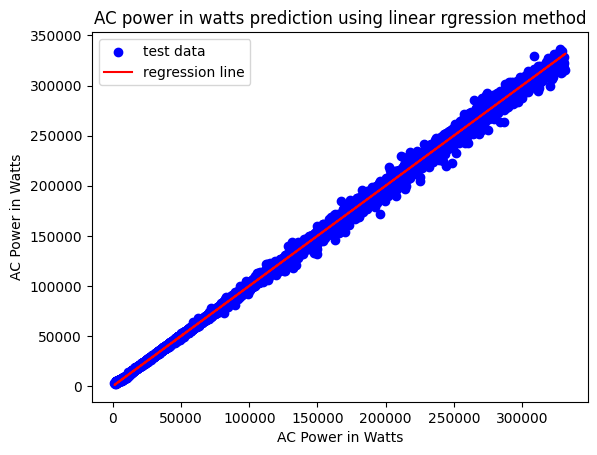

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='test data')
plt.plot(y_test, y_test, color='red', label='regression line')
plt.legend()
plt.xlabel('AC Power in Watts')
plt.ylabel('AC Power in Watts')
plt.title('AC power in watts prediction using linear rgression method')
plt.show()